# Co2 Emission

## <span style="color:red">Preprocessing</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("CO2 Emissions_Canada.csv")
ds.drop(["Make", "Model", "Vehicle Class", "Transmission"], axis=1, inplace=True)
ds

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
7380,2.0,4,Z,10.7,7.7,9.4,30,219
7381,2.0,4,Z,11.2,8.3,9.9,29,232
7382,2.0,4,Z,11.7,8.6,10.3,27,240
7383,2.0,4,Z,11.2,8.3,9.9,29,232


In [3]:
ds["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [4]:
# droping duplicates
ds.drop_duplicates(inplace=True)

### Data cleaning

In [5]:
ds.isnull().sum()
# no nulls

Engine Size(L)                      0
Cylinders                           0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
ds.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000,4427.000000
mean,3.098848,5.528349,12.437023,9.000407,10.890016,27.746781,248.512988
std,1.327120,1.809074,3.501817,2.256138,2.906438,7.382322,59.335228
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,9.900000,7.400000,8.800000,23.000000,205.000000
50%,3.000000,6.000000,12.000000,8.600000,10.500000,27.000000,244.000000
75%,3.600000,6.000000,14.400000,10.200000,12.500000,32.000000,285.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<div class="alert alert-info alert-block"><h5><span style="color:red">Note:</span> Removing outliers by visualizing features.</div>

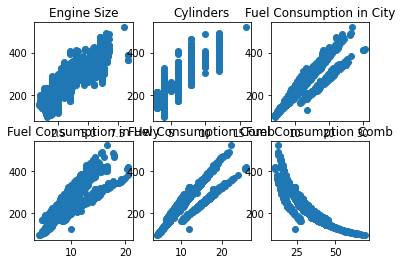

In [7]:
figure, axis = plt.subplots(2, 3)

axis[0, 0].scatter(ds["Engine Size(L)"], ds["CO2 Emissions(g/km)"])
axis[0, 0].set_title("Engine Size")

axis[0, 1].scatter(ds.Cylinders, ds["CO2 Emissions(g/km)"])
axis[0, 1].set_title("Cylinders")


axis[0, 2].scatter(ds["Fuel Consumption City (L/100 km)"], ds["CO2 Emissions(g/km)"])
axis[0, 2].set_title("Fuel Consumption in City")


axis[1, 0].scatter(ds["Fuel Consumption Hwy (L/100 km)"], ds["CO2 Emissions(g/km)"])
axis[1, 0].set_title("Fuel Consumption in Hwy")

axis[1, 1].scatter(ds["Fuel Consumption Comb (L/100 km)"], ds["CO2 Emissions(g/km)"])
axis[1, 1].set_title("Fuel Consumption Comb")

axis[1, 2].scatter(ds["Fuel Consumption Comb (mpg)"], ds["CO2 Emissions(g/km)"])
axis[1, 2].set_title("Fuel Consumption Comb")
# Combine all the operations and display
plt.show()


<div class="alert alert-info alert-block"><h5><span style="color:red">Note:</span> Fuel Consumption Comb (mpg) column will be deleted because of not being linear.</div>

In [8]:
ds.drop("Fuel Consumption Comb (mpg)", axis=1, inplace=True)

#### removing outliers according to the plots[Engine size]

In [9]:
ds[ds["Engine Size(L)"] > 7]

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
945,8.4,10,Z,20.0,13.0,16.9,389
1431,8.4,10,Z,19.4,11.3,15.8,363
2544,8.4,10,Z,19.2,11.3,15.6,364
3616,8.4,10,Z,19.9,12.6,16.6,387
4509,8.0,16,Z,26.8,16.6,22.2,522


In [10]:
ds.drop([945, 1431, 2544, 3616], inplace=True)

### Encoding Fuel type column

Fuel type:
,X = regular gasoline
,Z = premium gasoline
,D = diesel
,E = ethanol (E85)
,N = natural gas

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [12]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
ds = np.array(ct.fit_transform(ds))

In [13]:
ds

array([[  0. ,   0. ,   0. , ...,   6.7,   8.5, 196. ],
       [  0. ,   0. ,   0. , ...,   7.7,   9.6, 221. ],
       [  0. ,   0. ,   0. , ...,   5.8,   5.9, 136. ],
       ...,
       [  0. ,   0. ,   0. , ...,   7.7,   9.4, 219. ],
       [  0. ,   0. ,   0. , ...,   8.6,  10.3, 240. ],
       [  0. ,   0. ,   0. , ...,   8.7,  10.7, 248. ]])

### Splitting data

In [14]:
x = ds[:, 0:-1]
y = ds[:, -1]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## <span style="color:red">Processing</span>

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

### Evaluating the model

In [19]:
y_pred = regr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test, y_pred)

0.9882210286190809

<div class="alert alert-info alert-block"><h5><span style="color:red">Note:</span> the code in the below is used for numpy array to show all the columns.

In [22]:
np.set_printoptions(threshold=np.inf)

### Making some predictions

In [32]:
# first item in x_test
regr.predict([[ 0. ,  0. ,  0. ,  0. ,  1. ,  3. ,  6. , 13.6, 10.2, 12. ]])

array([279.28542201])

In [31]:
# fourth item  in x_test
regr.predict([ [ 0. ,  0. ,  0. ,  1. ,  0. ,  3. ,  6. , 13.4,  8.7, 11.2]])

array([261.85850907])